# <center><font color = 'darkpurple'><b>  STROKE PREDICTION</b></font></center>

![](https://media.istockphoto.com/photos/man-with-brain-stroke-symptoms-picture-id1168179082?k=20&m=1168179082&s=612x612&w=0&h=9OY1eRZhghhh4LPvsnxE5vx6G9tVF4piDqvRMrBdp3Y=)

## <font color = 'blue'>Problem Statement :</font>
- `A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes. A stroke is a medical emergency, and prompt treatment is crucial. Early action can reduce brain damage and other complications.`
- `Determine what makes a person at risk for stroke.`
- `Create a machine learning model to perform early detection of stroke for patients.`

# <font color = 'darkpurple'><b>1 <span style='color:#0386f7de'>|</span> Importing Libraries & Loading Dataset</b></font>
- **`For Data Manipulation`**: numpy, pandas, sklearn.
- **`For Data Visualization`**: matplotlib, seaborn, plotly.
- **`For ML Models`**: sklearn.


In [1]:
import numpy as np
import pandas as pd                  ## Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')

Dataset -
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [2]:
url = 'https://raw.githubusercontent.com/nirajpalve/Stroke-Prediction/main/stroke-data.csv'

In [3]:
data = pd.read_csv(url)    ## Loading Dataset
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


##  <font color = 'blue'> <span style='color:#0386f7de'>|</span> About the Dataset <a id="prep"></a></font>

-`According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.`

-`Attribute Information`

- `1) Id: Unique identifier.`
- `2) Gender: "Male", "Female" or "Other".`
- `3) Age: Age of the patient.`
- `4) Hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.`
- `5) Heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.`
- `6) Ever_married: "No" or "Yes".`
- `7) Work_type: "Children", "Govt job", "Never worked", "Private" or "Self-employed".`
- `8) Residence_type: "Rural" or "Urban".`
- `9) Avg_glucose_level: Average glucose level in blood.`
- `10) BMI: Body Mass Index.`
- `11) Smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown".`
- `12) Stroke: 1 if the patient had a stroke or 0 if not.`


#  <font color = 'darkpurple'><b>2 <span style='color:#0386f7de'>|</span> Exploratory Data Analysis(EDA) <a id="prep"></a></font>

In [4]:
data.info()  ## To check wheather null value exist or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
data['bmi'].isnull().sum()

np.int64(201)

In [6]:
data['gender'].value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


In [7]:
data.drop(index = data[data['gender']=='Other'].index[0] , axis=0, inplace = True)  ## Dropping other-gender from gender's column

In [8]:
data['gender'].value_counts()

,count
gender,
Female,2994
Male,2115


In [9]:
data.drop('id', axis = 1, inplace = True)  ## Removing 'id' column from the data.

In [10]:
df = data.copy()

In [11]:
df.describe()  ## Describe the data.

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


##  <font color = 'blue'><b><span style='color:#0386f7de'>|</span> Data Visualization <a id="prep"></a></font>

###  <font color = 'green'> <span style='color:#0386f7de'>|</span> Categorical Data <a id="prep"></a></font>

####  <font color = 'green'>1.1 <span style='color:#0386f7de'>|</span> Gender <a id="prep"></a></font>

In [12]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['gender'].unique())
print('Value Counts\n',df['gender'].value_counts())

Unique values
 ['Male' 'Female']
Value Counts
 gender
Female    2994
Male      2115
Name: count, dtype: int64


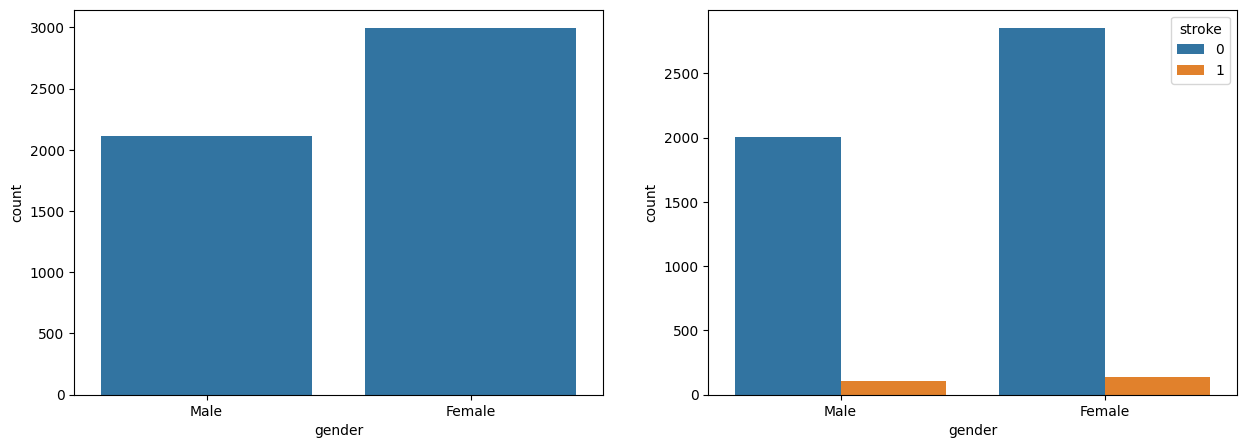

In [13]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Gender Visualization.
sns.countplot(x='gender', data=df, ax = axes[0])
sns.countplot(x='gender', hue='stroke', data=df, ax = axes[1])
plt.show()

Observation:- We can see that, there is not much difference between stroke rate concerning gender.

####  <font color = 'green'>1.2 <span style='color:#0386f7de'>|</span> Hypertension <a id="prep"></a></font>

In [14]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['hypertension'].unique())
print('Value Counts\n',df['hypertension'].value_counts())

Unique values
 [0 1]
Value Counts
 hypertension
0    4611
1     498
Name: count, dtype: int64


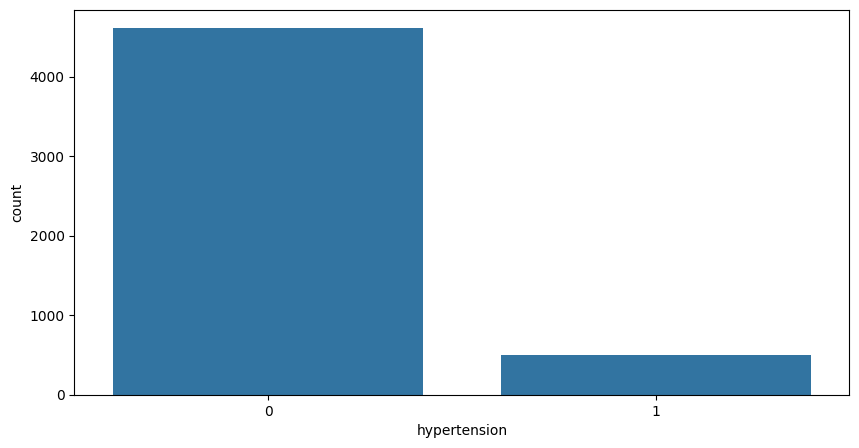

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='hypertension', data=df)
plt.show()

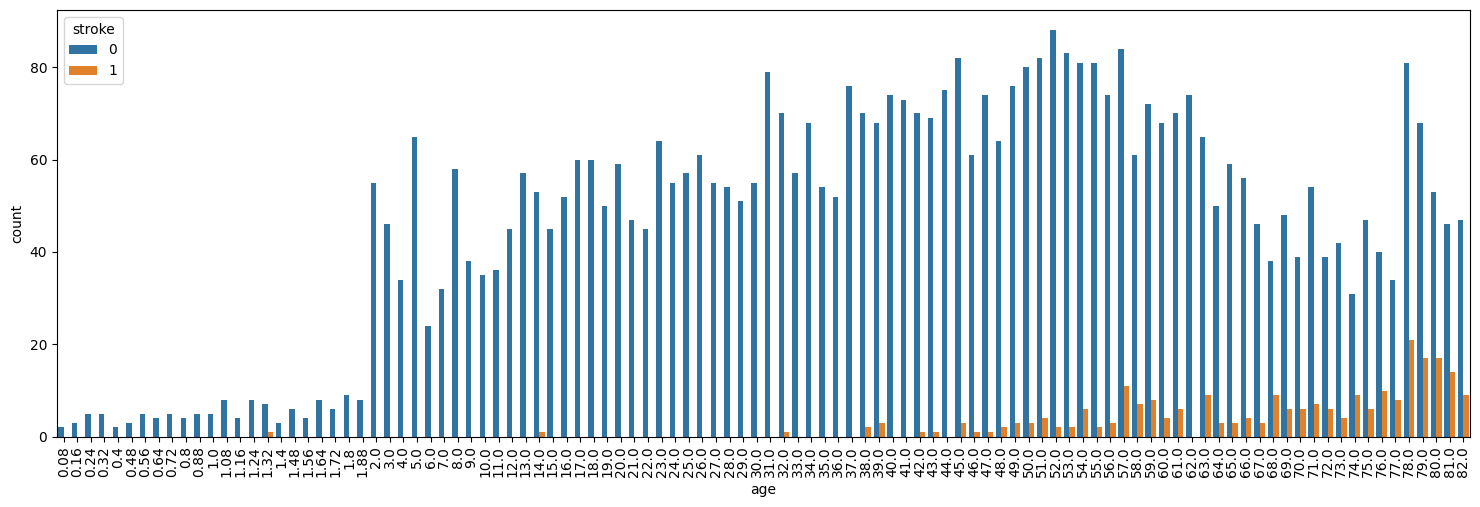

In [16]:
plt.figure(figsize=(15,5))
# sns.countplot(x='hypertension', data=df)
# sns.countplot(x='hypertension', hue='stroke', data=df, ax = axes[1])
sns.countplot(x='age', hue='stroke', data=df)
plt.tight_layout()
# Rotating X-axis labels
plt.xticks(rotation = 90)
plt.show()

Observation:- Hypertension is rare in young people and common in aged people. Hypertension can cause a stroke. It has quite little data on patients having hypertension.

####  <font color = 'green'>1.3 <span style='color:#0386f7de'>|</span> Heart Disease <a id="prep"></a></font>

In [17]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['heart_disease'].unique())
print('Value Counts\n',df['heart_disease'].value_counts())

Unique values
 [1 0]
Value Counts
 heart_disease
0    4833
1     276
Name: count, dtype: int64


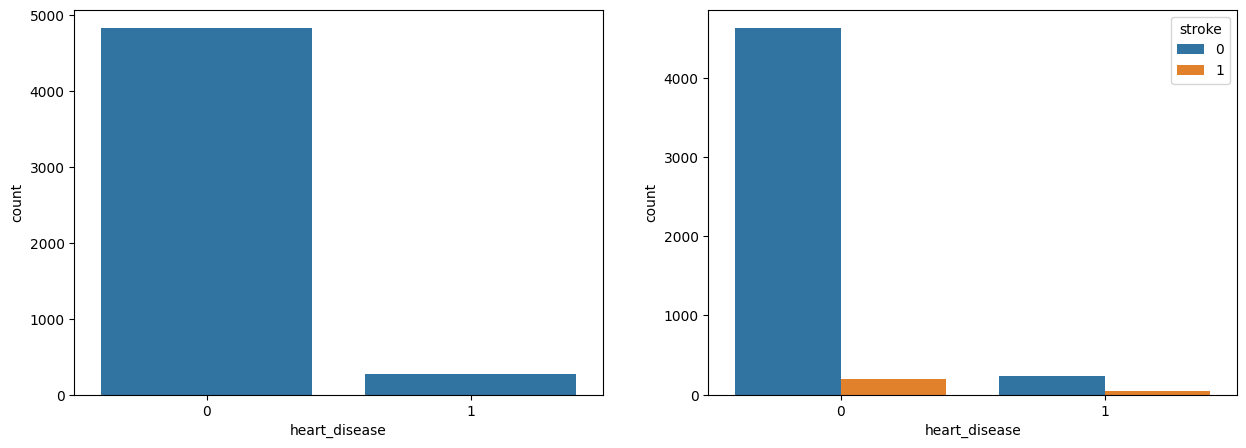

In [18]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Heart_Disease Visualization.
sns.countplot(x='heart_disease', data=df, ax = axes[0])
sns.countplot(x='heart_disease', hue='stroke', data=df, ax = axes[1])
plt.show()

It’s a little bit difficult to get an idea. But as per this plot, we can say that heart disease is not affecting Stroke.

####  <font color = 'green'>1.4 <span style='color:#0386f7de'>|</span> Marital Status <a id="prep"></a></font>

In [19]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['ever_married'].unique())
print('Value Counts\n',df['ever_married'].value_counts())

Unique values
 ['Yes' 'No']
Value Counts
 ever_married
Yes    3353
No     1756
Name: count, dtype: int64


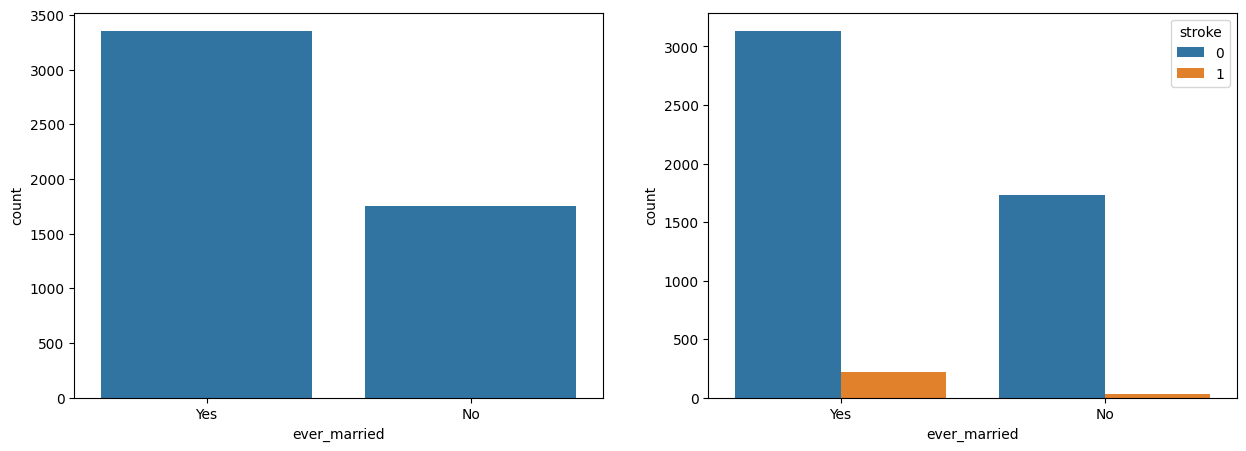

In [20]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Heart_Disease Visualization.
sns.countplot(x='ever_married', data=df, ax = axes[0])
sns.countplot(x='ever_married', hue='stroke', data=df, ax = axes[1])
plt.show()

As per the plot, there is little bit possibility that married person can have stroke.

####  <font color = 'green'>1.5 <span style='color:#0386f7de'>|</span> Work Type <a id="prep"></a></font>

In [21]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['work_type'].unique())
print('Value Counts\n',df['work_type'].value_counts())

Unique values
 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Value Counts
 work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


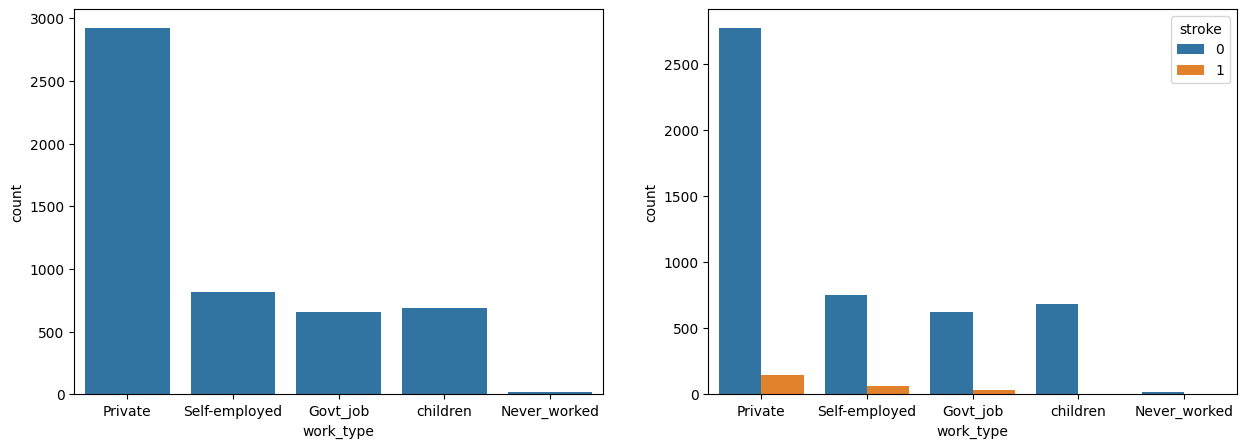

In [22]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Heart_Disease Visualization.
sns.countplot(x='work_type', data=df, ax = axes[0])
sns.countplot(x='work_type', hue='stroke', data=df, ax = axes[1])
plt.show()

People working in the Private sector have a higher risk of getting a stroke. And people who have never worked have a very less stroke rate.

####  <font color = 'green'>1.6 <span style='color:#0386f7de'>|</span> Residence Type <a id="prep"></a></font>

In [23]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['Residence_type'].unique())
print('Value Counts\n',df['Residence_type'].value_counts())

Unique values
 ['Urban' 'Rural']
Value Counts
 Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64


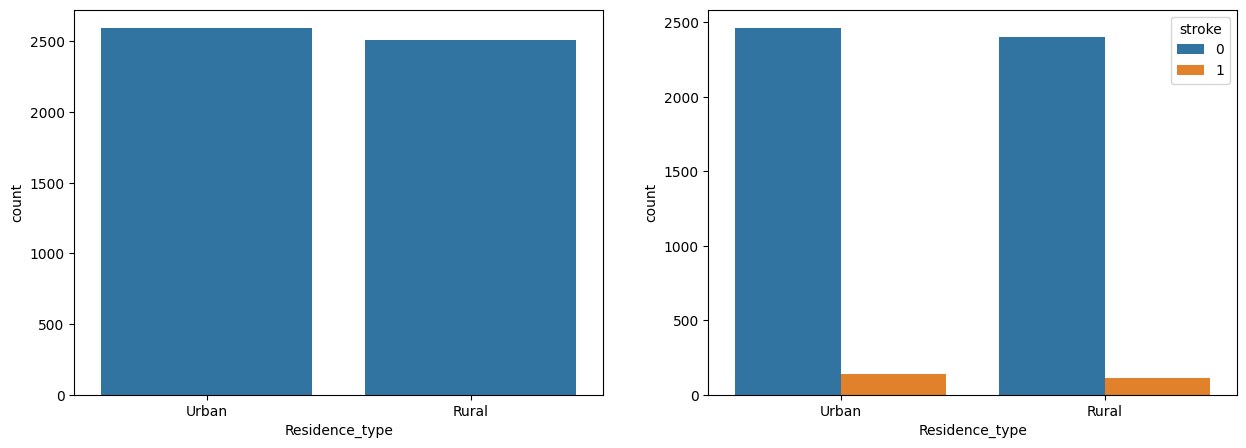

In [24]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Heart_Disease Visualization.
sns.countplot(x='Residence_type', data=df, ax = axes[0])
sns.countplot(x='Residence_type', hue='stroke', data=df, ax = axes[1])
plt.show()

As we can see there not much difference in both attribute values.

####  <font color = 'green'>1.7 <span style='color:#0386f7de'>|</span> Smoking Status <a id="prep"></a></font>

In [25]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['smoking_status'].unique())
print('Value Counts\n',df['smoking_status'].value_counts())

Unique values
 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Value Counts
 smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64


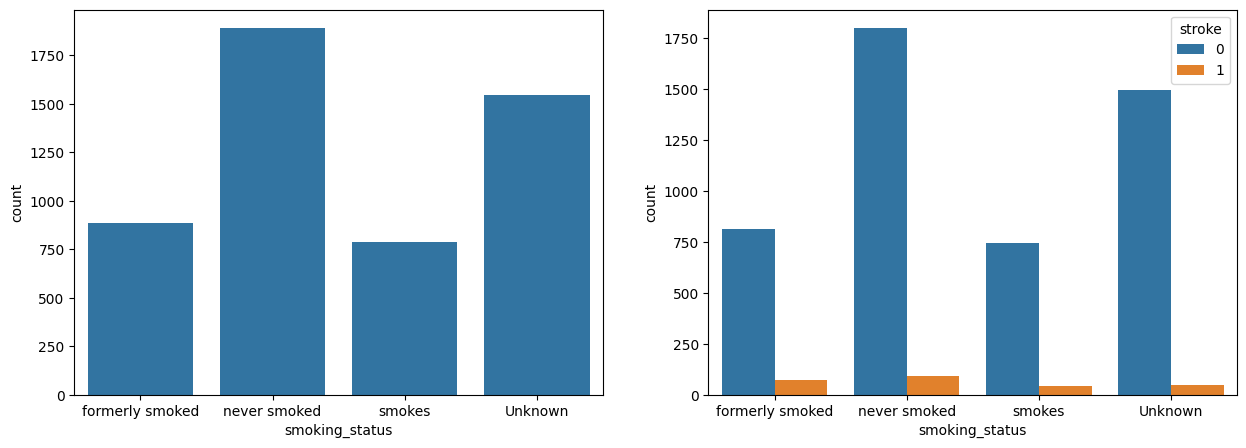

In [26]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Heart_Disease Visualization.
sns.countplot(x='smoking_status', data=df, ax = axes[0])
sns.countplot(x='smoking_status', hue='stroke', data=df, ax = axes[1])
plt.show()

As per these plots, we can see there is not much difference in the chances of stroke irrespective of smoking status.

####  <font color = 'green'>1.8 <span style='color:#0386f7de'>|</span> Stroke <a id="prep"></a></font>

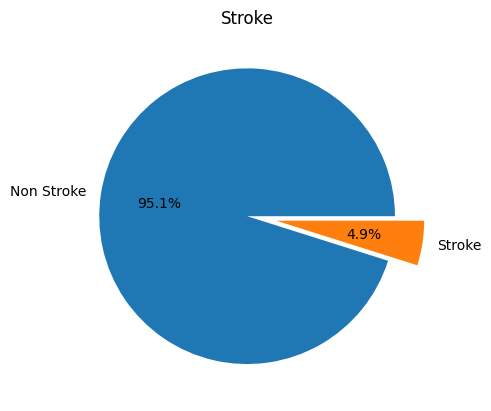

In [27]:
plt.title("Stroke")     ## Stroke Visualization
plt.pie(np.array(df['stroke'].value_counts()),labels=['Non Stroke','Stroke'],explode=[0,0.2],autopct='%1.1f%%')
plt.show()

###  <font color = 'green'> <span style='color:#0386f7de'>|</span> Numerical Data <a id="prep"></a></font>

####  <font color = 'green'>2.1 <span style='color:#0386f7de'>|</span> Age <a id="prep"></a></font>

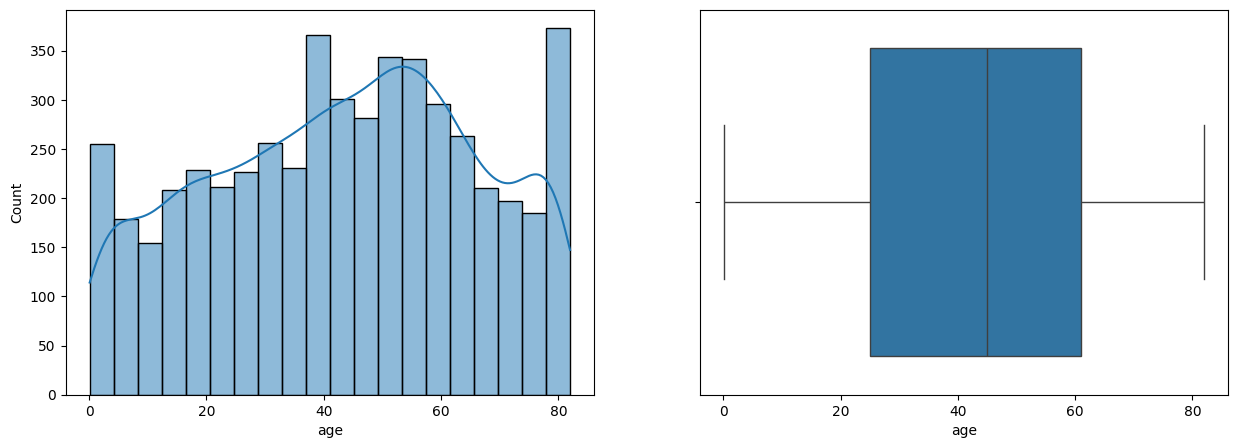

In [28]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.histplot(df['age'], ax = ax[0], kde=True)     ## Age Visualization
sns.boxplot(data = df, x = df['age'], ax = ax[1])
plt.show()

####  <font color = 'green'>2.2 <span style='color:#0386f7de'>|</span> Average_glucose_level <a id="prep"></a></font>

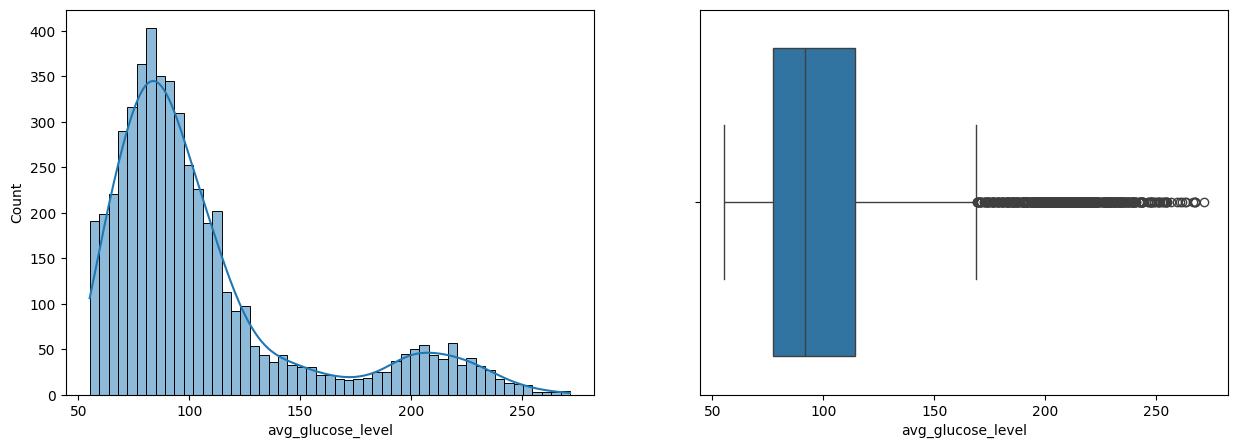

In [29]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.histplot(df['avg_glucose_level'], ax = ax[0], kde=True)    ## Glucose_level Visualization
sns.boxplot(data = df, x = df['avg_glucose_level'], ax = ax[1])
plt.show()

[Link](https://www.lark.com/resources/blood-sugar-chart)

There are outliers present in avgerage_glucose column, we dont have to remove the outliers.

If we will not remove it will be help to our model to predict or perform well.

####  <font color = 'green'>2.3 <span style='color:#0386f7de'>|</span>BMI <a id="prep"></a></font>

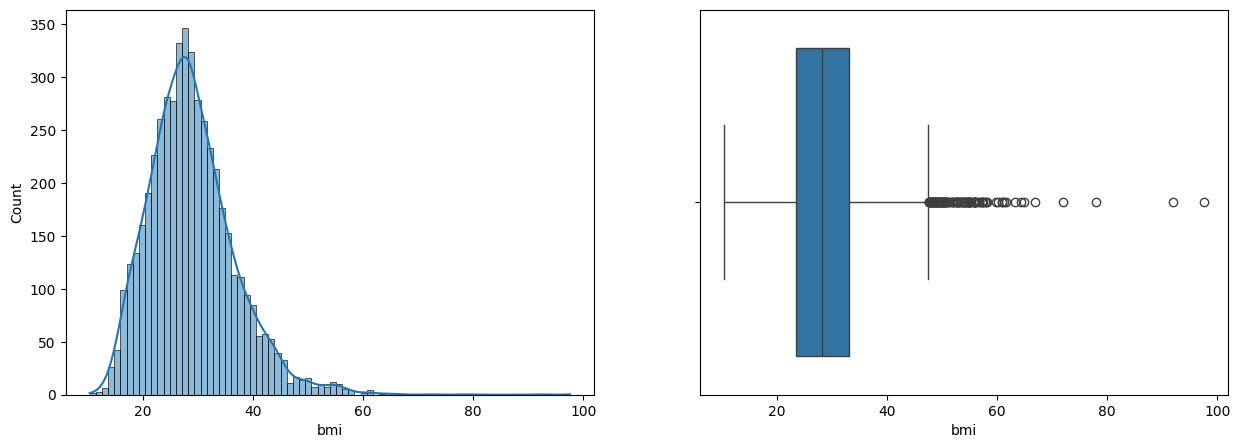

In [30]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.histplot(df['bmi'], ax = ax[0], kde=True)     ## BMI Visualization
sns.boxplot(data = df, x = df['bmi'], ax = ax[1])
plt.show()

##  <font color = 'blue'><b><span style='color:#0386f7de'>|</span> Cleaning Data <a id="prep"></a></font>

In [31]:
df.isnull().sum()   ##  Drop nulls or treat null values as instructed

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


The dataset contains some missing values in bmi column.Let's try to remove or fill that first before moving on. Looking into it I found that bmi mostly depends on age and gender. So trying to impute missing values based on gender.


After looking the data we get to know that there are 201 NA values in _bmi_ column, so for treating the data we will put the nan values as median.

In [32]:
bmi_median = df['bmi'].median()

In [33]:
df = df.fillna(bmi_median)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


Looking at the BMI Visualization of box plot, we can see there are outliers in our data.

In [35]:
df['bmi_1'] = np.log(df['bmi'])

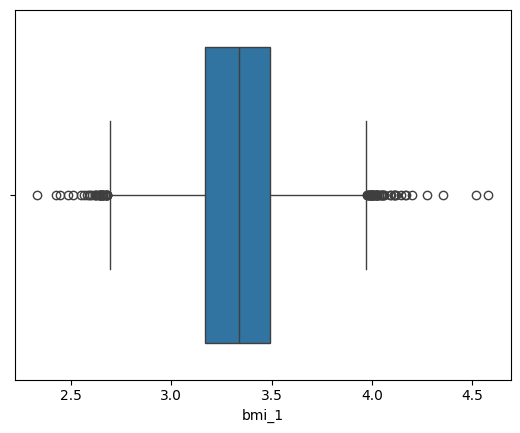

In [36]:
sns.boxplot(data = df, x = df['bmi_1'])
plt.show()

In [37]:
df.drop('bmi', axis = 1, inplace = True )  ## Dropping earlier column of bmi

In [38]:
df_1 = df.copy()

##  <font color = 'blue'><b><span style='color:#0386f7de'>|</span> Convert Non-numerical Data into Numerical: Label Encoding <a id="prep"></a></font>

In [39]:
df_1["gender"][df_1["gender"]=="Male"] = 1
df_1["gender"][df_1["gender"]=="Female"] = 0

In [40]:
df_1["ever_married"][df_1["ever_married"]=="Yes"]=1
df_1["ever_married"][df_1["ever_married"]=="No"]=0

In [41]:
df_1["Residence_type"][df_1["Residence_type"]=="Urban"]=1
df_1["Residence_type"][df_1["Residence_type"]=="Rural"]=0

In [42]:
df_1["work_type"][df_1["work_type"]=="Private"]=1
df_1["work_type"][df_1["work_type"]=="Self-employed"]=2
df_1["work_type"][df_1["work_type"]=="Govt_job"]=3
df_1["work_type"][df_1["work_type"]=="children"]=4
df_1["work_type"][df_1["work_type"]=="Never_worked"]=5

In [43]:
df_1["smoking_status"][df_1["smoking_status"]=="never smoked"]=1
df_1["smoking_status"][df_1["smoking_status"]=="Unknown"]=2
df_1["smoking_status"][df_1["smoking_status"]=="formerly smoked"]=3
df_1["smoking_status"][df_1["smoking_status"]=="smokes"]=4

## <font color = 'blue'><b> <span style='color:#0386f7de'>|</span> Splitting data into train & test set <a id="prep"></a></font>

In [44]:
X = df_1.drop(columns = 'stroke')
y = df_1[['stroke']]

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state = 12, stratify = y )  ## Spliting data into train and test.

In [46]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape   ## Shape of the train and test data.

((3831, 10), (1278, 10), (3831, 1), (1278, 1))

#  <font color = 'darkpurple'><b>3 <span style='color:#0386f7de'>|</span> Model Building (Simple Models) <a id="prep"></a></font>

###  <font color = 'blue'><b>3.1 <span style='color:#0386f7de'>|</span> Logistic Regression <a id="prep"></a></font>

In [47]:
logistic_model = LogisticRegression()    ## Importing Model
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [48]:
# Checking the intercept and coefficient values.
print("Intercept =" , logistic_model.intercept_)
print("coefficients = \n " , logistic_model.coef_)

Intercept = [-5.68824385]
coefficients = 
  [[-0.21591811  0.07459957  0.69737387  0.27046031 -0.53449542 -0.0175978
  -0.0093206   0.00304313  0.08504212 -0.50455151]]


In [49]:
# calculating the Accuracy, Sensitivity, Specificity  of the model on train data

predict1 = logistic_model.predict(X_train)
cm1 = confusion_matrix(y_train,predict1)
print("COnfusion matrix = \n" , cm1)

total1 = sum(sum(cm1))
Accuracy = (cm1[0,0] + cm1[1,1]) / total1
print("Overall accuracy on train data for all the variables = " , Accuracy)
print ('Accuracy : ', Accuracy)

Sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', Sensitivity )

Specificity  = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', Specificity )

COnfusion matrix = 
 [[3643    1]
 [ 186    1]]
Overall accuracy on train data for all the variables =  0.9511876794570608
Accuracy :  0.9511876794570608
Sensitivity :  0.9997255762897914
Specificity :  0.0053475935828877


In [50]:
n = 100
train_acc = []
test_acc = []
class1_train_acc = []
class1_test_acc = []

for i in range(n):

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7)


    # Building the logistic regression model on train data
    logistic = LogisticRegression()
    logistic.fit(X_train,y_train)

    # Predicting using the test data
    predict = logistic.predict(X_train)

    # Calculating confusion matrix
    cm= confusion_matrix(y_train,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    train_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0])
    class1_train_acc.append(class1_acc)


    # Building the logistic regression model on test data
    logistic = LogisticRegression()
    logistic.fit(X_test,y_test)

    # Predicting using the test data
    predict = logistic.predict(X_test)

    # Calculating confusion matrix
    cm = confusion_matrix(y_test,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    accuracy
    test_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0])
    class1_test_acc.append(class1_acc)


print("Overall Train accuracy:", train_acc , "\n")
print("Overall Test Accuracy:" , test_acc)

Overall Train accuracy: [np.float64(0.950503355704698), np.float64(0.9502237136465325), np.float64(0.9532997762863534), np.float64(0.953579418344519), np.float64(0.9521812080536913), np.float64(0.9544183445190156), np.float64(0.9468680089485458), np.float64(0.9507829977628636), np.float64(0.9516219239373602), np.float64(0.9544183445190156), np.float64(0.9496644295302014), np.float64(0.9530201342281879), np.float64(0.9488255033557047), np.float64(0.9496644295302014), np.float64(0.9493847874720358), np.float64(0.950503355704698), np.float64(0.9507829977628636), np.float64(0.9546979865771812), np.float64(0.9530201342281879), np.float64(0.9499440715883669), np.float64(0.9499440715883669), np.float64(0.953579418344519), np.float64(0.950503355704698), np.float64(0.9499440715883669), np.float64(0.9499440715883669), np.float64(0.9510626398210291), np.float64(0.9510626398210291), np.float64(0.9499440715883669), np.float64(0.9510626398210291), np.float64(0.9519015659955258), np.float64(0.9496644

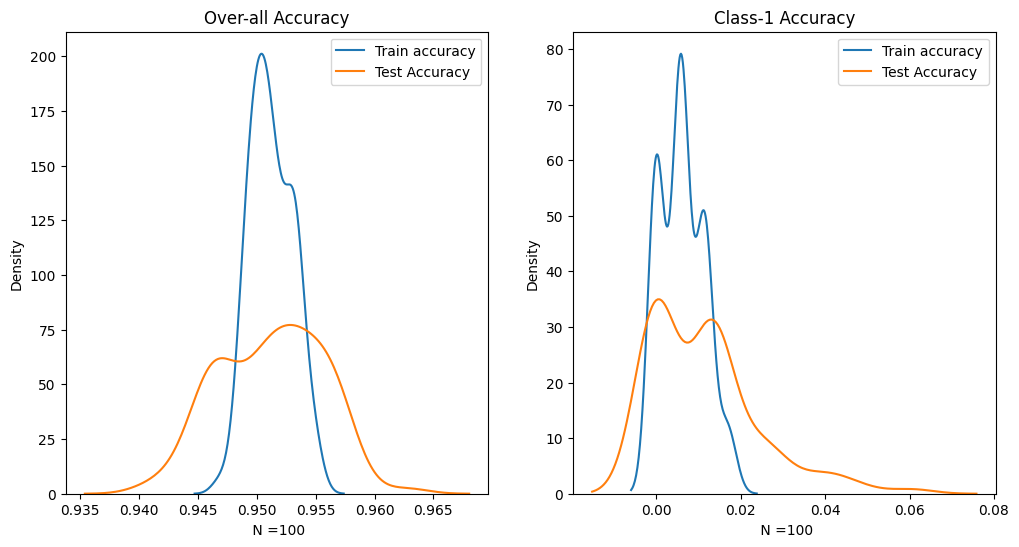

In [51]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.distplot(train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Over-all Accuracy')

plt.subplot(1,2,2)
sns.distplot(class1_train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(class1_test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Class-1 Accuracy')
plt.show()

###  <font color = 'blue'><b>3.2 <span style='color:#0386f7de'>|</span> Decision Tree<a id="prep"></a></font>

In [52]:
feature = ['age','hypertension','heart_disease','avg_glucose_level','bmi_1','gender_Male','ever_married_Yes',	'work_type_Never_worked',	'work_type_Private',	'work_type_Self-employed',	'work_type_children',	'Residence_type_Urban',	'smoking_status_formerly smoked',	'smoking_status_never smoked',	'smoking_status_smokes']

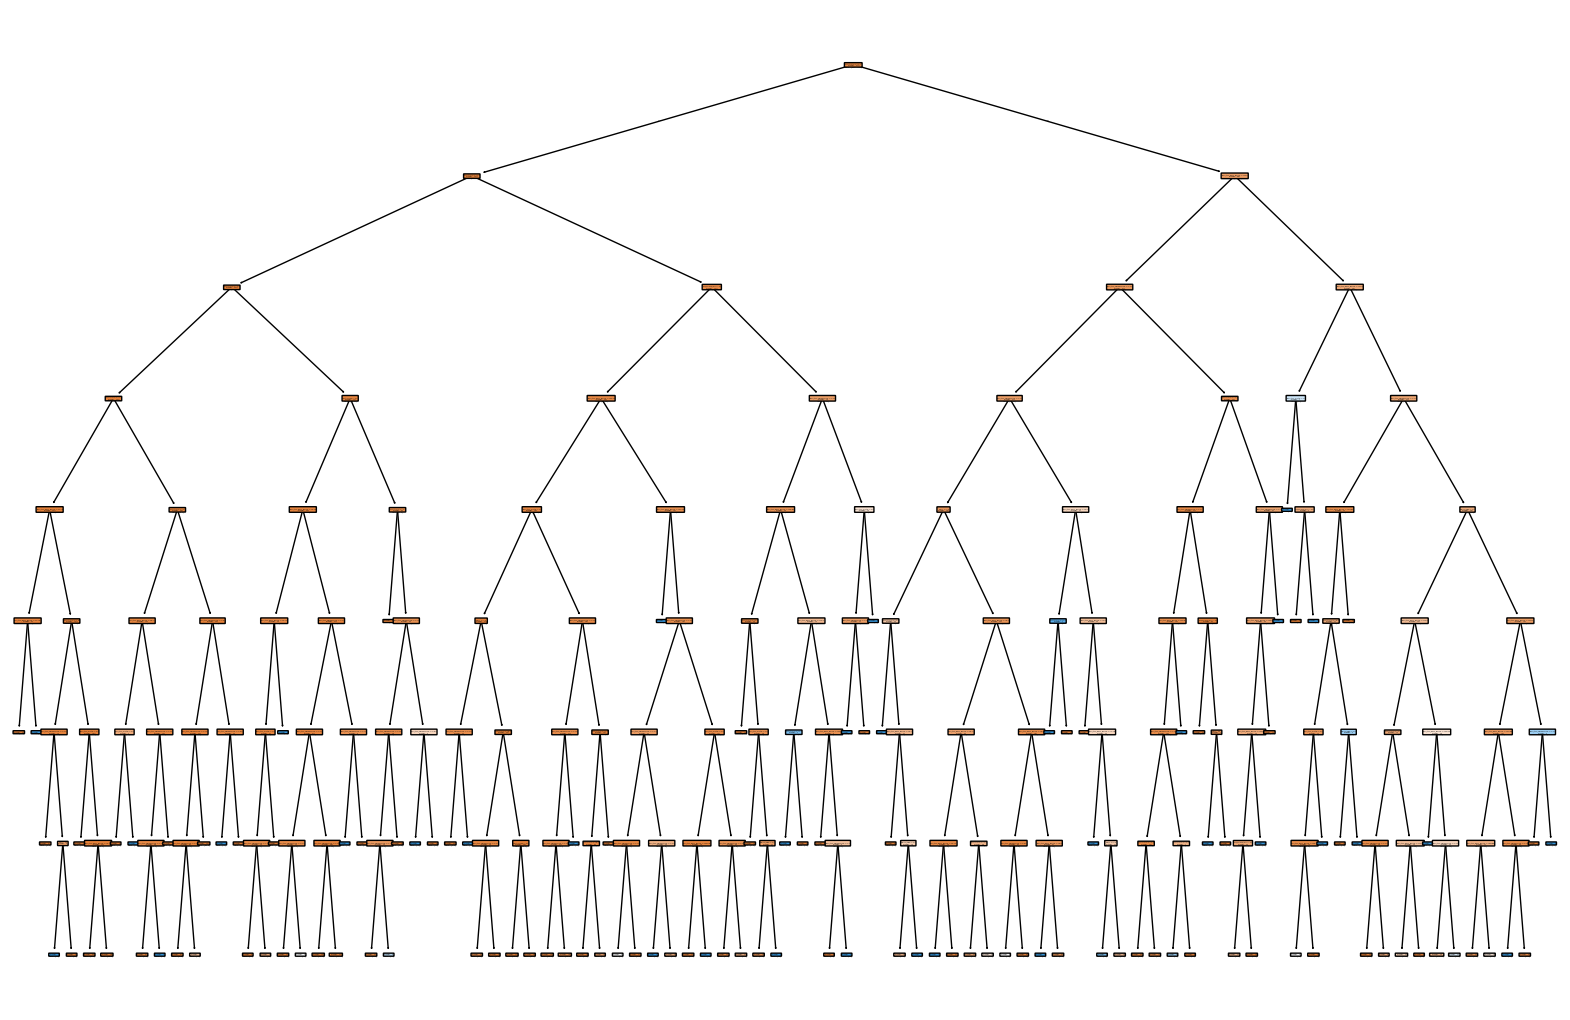

In [53]:
from sklearn import tree
#Building Tree Model
DTree = tree.DecisionTreeClassifier(max_depth=8)
DTree.fit(X,y)

##Plotting the trees
from sklearn.tree import plot_tree
plt.figure(figsize=(20,13))
plot_tree(DTree, filled=True,
                     rounded=True,
                     impurity=False,
                     feature_names = feature)
plt.show()

In [54]:
dt_model = DecisionTreeClassifier(random_state=12,max_depth=8)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, random_state=12)

In [55]:
predict1 = dt_model.predict(X_train)
predict2 = dt_model.predict(X_test)

cm = confusion_matrix(y_train, predict1)
print ("CM:",   cm)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train Accuracy", accuracy1)

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)

Sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', Sensitivity )

Specificity  = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', Specificity )

CM: [[3383   17]
 [  98   78]]
Train Accuracy 0.9678411633109619
Test Accuracy 0.9315068493150684
Sensitivity :  0.995
Specificity :  0.4431818181818182


In [56]:
n = 100
train_acc = []
test_acc = []
class1_train_acc = []
class1_test_acc = []

for i in range(n):

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7)


    # Building the logistic regression model on train data
    dt_model = DecisionTreeClassifier(random_state=15,max_depth=8)
    dt_model.fit(X_train,y_train)

    # Predicting using the test data
    predict = dt_model.predict(X_train)

    # Calculating confusion matrix
    cm= confusion_matrix(y_train,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    train_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0])
    class1_train_acc.append(class1_acc)


    # Building the logistic regression model on test data
    dt_model = DecisionTreeClassifier(random_state=15,max_depth=8)
    dt_model.fit(X_train,y_train)

    # Predicting using the test data
    predict = dt_model.predict(X_test)

    # Calculating confusion matrix
    cm = confusion_matrix(y_test,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    accuracy
    test_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0])
    class1_test_acc.append(class1_acc)


print("Overall Train accuracy:", train_acc , "\n")
print("Overall Test Accuracy:" , test_acc)

Overall Train accuracy: [np.float64(0.9714765100671141), np.float64(0.968400447427293), np.float64(0.9667225950782998), np.float64(0.9630872483221476), np.float64(0.9619686800894854), np.float64(0.9658836689038032), np.float64(0.968400447427293), np.float64(0.9639261744966443), np.float64(0.9678411633109619), np.float64(0.9745525727069351), np.float64(0.9686800894854586), np.float64(0.9681208053691275), np.float64(0.9692393736017897), np.float64(0.9675615212527964), np.float64(0.9636465324384788), np.float64(0.9689597315436241), np.float64(0.9670022371364653), np.float64(0.9692393736017897), np.float64(0.9656040268456376), np.float64(0.9695190156599552), np.float64(0.9672818791946308), np.float64(0.9628076062639821), np.float64(0.9692393736017897), np.float64(0.9672818791946308), np.float64(0.9686800894854586), np.float64(0.9667225950782998), np.float64(0.9672818791946308), np.float64(0.9658836689038032), np.float64(0.9714765100671141), np.float64(0.9664429530201343), np.float64(0.9642

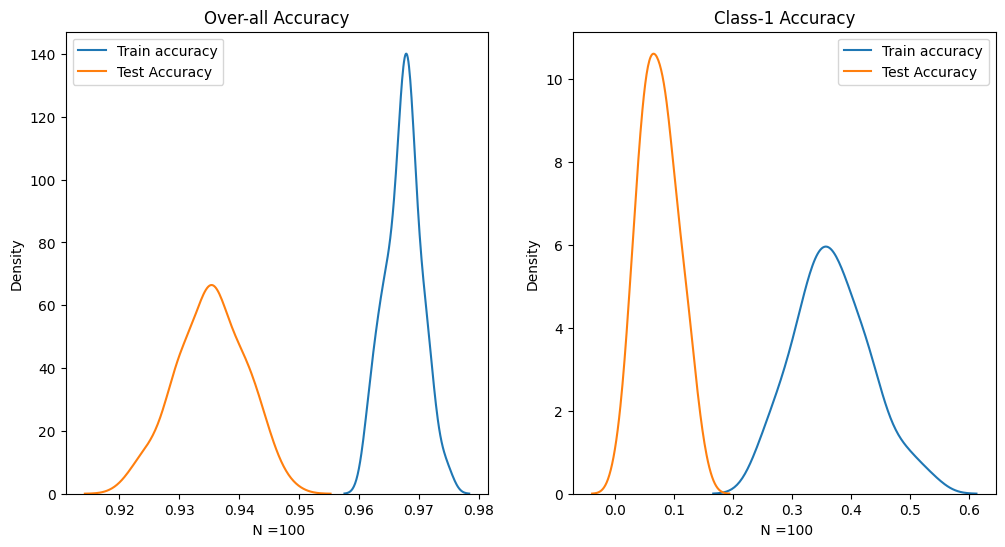

In [57]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.distplot(train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Over-all Accuracy')

plt.subplot(1,2,2)
sns.distplot(class1_train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(class1_test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Class-1 Accuracy')
plt.show()

#  <font color = 'darkpurple'><b>4<span style='color:#0386f7de'>|</span> Feature Engineering <a id="prep"></a></font>

###  <font color = 'blue'><b>4.1 <span style='color:#0386f7de'>|</span> One Hot Encoding  <a id="prep"></a></font>

In [58]:
df_2 = df.copy()

In [59]:
df_2['work_type'].value_counts()

,count
work_type,
Private,2924
Self-employed,819
children,687
Govt_job,657
Never_worked,22


In [60]:
num_cols = ['age','avg_glucose_level','bmi_1']         ## Dividing numerical and categorical data for numerical.
cat_col = ['work_type','smoking_status']
cat_cols = ['gender','ever_married','Residence_type']

In [62]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   smoking_status     5109 non-null   object 
 9   stroke             5109 non-null   int64  
 10  bmi_1              5109 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


In [61]:
df_encc = pd.get_dummies(df_2[cat_cols], drop_first=True)
df_enc = pd.get_dummies(df_2[cat_col])

In [63]:
df_encc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   gender_Male           5109 non-null   bool 
 1   ever_married_Yes      5109 non-null   bool 
 2   Residence_type_Urban  5109 non-null   bool 
dtypes: bool(3)
memory usage: 54.9 KB


In [64]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   work_type_Govt_job              5109 non-null   bool 
 1   work_type_Never_worked          5109 non-null   bool 
 2   work_type_Private               5109 non-null   bool 
 3   work_type_Self-employed         5109 non-null   bool 
 4   work_type_children              5109 non-null   bool 
 5   smoking_status_Unknown          5109 non-null   bool 
 6   smoking_status_formerly smoked  5109 non-null   bool 
 7   smoking_status_never smoked     5109 non-null   bool 
 8   smoking_status_smokes           5109 non-null   bool 
dtypes: bool(9)
memory usage: 84.8 KB


In [65]:
df_enc.head()

,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,False,False,True,False,False,False,True,False,False
1,False,False,False,True,False,False,False,True,False
2,False,False,True,False,False,False,False,True,False
3,False,False,True,False,False,False,False,False,True
4,False,False,False,True,False,False,False,True,False


In [66]:
df_2['work_type'].head()

,work_type
0,Private
1,Self-employed
2,Private
3,Private
4,Self-employed


In [67]:
df_2[df_encc.columns] = df_encc
df_2[df_enc.columns] = df_enc
df_2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,...,Residence_type_Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,...,True,False,False,True,False,False,False,True,False,False
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,...,False,False,False,False,True,False,False,False,True,False
2,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,...,False,False,False,True,False,False,False,False,True,False
3,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,...,True,False,False,True,False,False,False,False,False,True
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,...,False,False,False,False,True,False,False,False,True,False


In [68]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5109 non-null   object 
 1   age                             5109 non-null   float64
 2   hypertension                    5109 non-null   int64  
 3   heart_disease                   5109 non-null   int64  
 4   ever_married                    5109 non-null   object 
 5   work_type                       5109 non-null   object 
 6   Residence_type                  5109 non-null   object 
 7   avg_glucose_level               5109 non-null   float64
 8   smoking_status                  5109 non-null   object 
 9   stroke                          5109 non-null   int64  
 10  bmi_1                           5109 non-null   float64
 11  gender_Male                     5109 non-null   bool   
 12  ever_married_Yes                5109 no

In [69]:
df_2.drop(['gender','ever_married','work_type','Residence_type','smoking_status'], axis =1, inplace = True)

In [70]:
df_2

,age,hypertension,heart_disease,avg_glucose_level,stroke,bmi_1,gender_Male,ever_married_Yes,Residence_type_Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,1,3.600048,True,True,True,False,False,True,False,False,False,True,False,False
1,61.0,0,0,202.21,1,3.335770,False,True,False,False,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,1,3.481240,True,True,False,False,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,1,3.538057,False,True,True,False,False,True,False,False,False,False,False,True
4,79.0,1,0,174.12,1,3.178054,False,True,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,0,3.335770,False,True,True,False,False,True,False,False,False,False,True,False
5106,81.0,0,0,125.20,0,3.688879,False,True,True,False,False,False,True,False,False,False,True,False
5107,35.0,0,0,82.99,0,3.421000,False,True,False,False,False,False,True,False,False,False,True,False
5108,51.0,0,0,166.29,0,3.242592,True,True,False,False,False,True,False,False,False,True,False,False


##  <font color = 'blue'><b>4.2 <span style='color:#0386f7de'>|</span> Over Sampling <a id="prep"></a></font>

Looking at stroke visualization, we can tell that our data is not equally distributed. So here we will use over sampling method to balance our target variable.

In [71]:
print("Actual Data :", df_2.shape)

#Frequency count on target column
freq = df_2['stroke'].value_counts()
print(freq)
print((freq/freq.sum())*100)

#Classwise data
stroke_class0 = df_2[df_2['stroke'] == 0]
stroke_class1 = df_2[df_2['stroke'] == 1]

print("Class0 Actual :", stroke_class0.shape)
print("Class1 Actual  :", stroke_class1.shape)


Actual Data : (5109, 18)
stroke
0    4860
1     249
Name: count, dtype: int64
stroke
0    95.126248
1     4.873752
Name: count, dtype: float64
Class0 Actual : (4860, 18)
Class1 Actual  : (249, 18)


In [73]:
##Undersampling of class-0
## Consider half of class-0
stroke_class0_under = stroke_class0.sample(int(0.5*len(stroke_class0)))
print("Class0 Undersample :", stroke_class0_under.shape)

##Oversampling of Class-1
# Lets increase the size by four times
stroke_class1_over = stroke_class1.sample(8*len(stroke_class1),replace=True)
print("Class1 Oversample :", stroke_class1_over.shape)

#Concatenate to create the final balanced data
stroke_balanced=pd.concat([stroke_class0_under,stroke_class1_over])
print("Final Balannced Data :", stroke_balanced.shape)

#Frequency count on target column in the balanced data
freq=stroke_balanced['stroke'].value_counts()
print(freq)
print((freq/freq.sum())*100)

Class0 Undersample : (2430, 18)
Class1 Oversample : (1992, 18)
Final Balannced Data : (4422, 18)
stroke
0    2430
1    1992
Name: count, dtype: int64
stroke
0    54.95251
1    45.04749
Name: count, dtype: float64


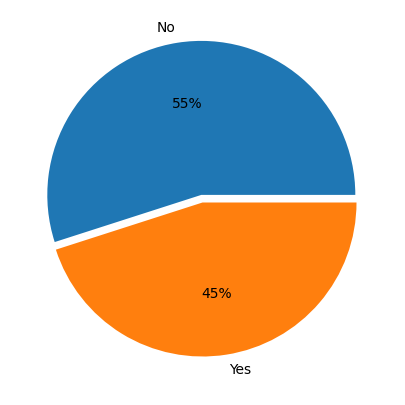

In [75]:
plt.figure(figsize=(8,5))
plt.pie(x=stroke_balanced['stroke'].value_counts(),explode=(0.05,0),autopct='%1.0f%%',labels=['No','Yes'])
plt.show()

##  <font color = 'blue'><b>4.3 <span style='color:#0386f7de'>|</span> Correlation Matrix  <a id="prep"></a></font>

In [78]:
stroke_balanced

,age,hypertension,heart_disease,avg_glucose_level,stroke,bmi_1,gender_Male,ever_married_Yes,Residence_type_Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1169,18.0,0,0,140.52,0,3.310543,True,True,False,False,False,True,False,False,False,False,True,False
596,53.0,0,0,71.15,0,3.261935,False,True,True,False,False,False,True,False,False,True,False,False
3296,48.0,0,0,64.18,0,3.468856,True,False,False,False,False,False,True,False,False,False,True,False
4298,14.0,0,0,91.32,0,3.190476,False,False,False,False,False,True,False,False,False,False,True,False
2484,17.0,0,0,92.11,0,3.761200,False,False,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,59.0,0,0,96.16,1,3.786460,True,True,False,False,False,True,False,False,True,False,False,False
29,59.0,0,0,211.78,1,3.335770,True,True,False,False,False,True,False,False,False,True,False,False
210,39.0,0,0,83.24,1,3.269569,False,True,True,False,False,True,False,False,False,False,True,False
16,64.0,0,1,191.61,1,3.624341,True,True,True,False,False,True,False,False,False,False,False,True


In [79]:
df_3 = stroke_balanced.copy()

In [80]:
corr_matrix = df_3.corr()   ## Corrlation Matrix.
corr_matrix

,age,hypertension,heart_disease,avg_glucose_level,stroke,bmi_1,gender_Male,ever_married_Yes,Residence_type_Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.283174,0.260022,0.246947,0.572851,0.271096,-0.004521,0.580320,0.034804,0.066748,-0.083824,0.061605,0.284785,-0.609203,-0.320093,0.203528,0.115820,-0.002422
hypertension,0.283174,1.000000,0.108562,0.168900,0.240262,0.107866,-0.009852,0.107542,0.006480,0.002925,-0.022333,-0.051704,0.151107,-0.131519,-0.197854,0.082435,0.093370,0.018140
heart_disease,0.260022,0.108562,1.000000,0.251423,0.221422,0.076708,0.093130,0.068879,0.021520,0.007943,-0.017365,0.050694,-0.000044,-0.099568,-0.065997,0.016315,-0.052631,0.128737
avg_glucose_level,0.246947,0.168900,0.251423,1.000000,0.245030,0.205591,0.081862,0.189504,0.035138,0.016784,-0.019277,0.063882,-0.015003,-0.112205,-0.075615,0.078389,-0.024688,0.034161
stroke,0.572851,0.240262,0.221422,0.245030,1.000000,0.130814,0.006390,0.281282,0.040864,0.009738,-0.045214,0.018048,0.140600,-0.247795,-0.151988,0.127286,0.018458,0.012798
bmi_1,0.271096,0.107866,0.076708,0.205591,0.130814,1.000000,-0.013813,0.307214,0.025793,0.045923,-0.050250,0.184659,0.049384,-0.461023,-0.253265,0.112759,0.070044,0.080262
gender_Male,-0.004521,-0.009852,0.093130,0.081862,0.006390,-0.013813,1.000000,0.016902,-0.009426,-0.052996,0.013201,0.054528,-0.059010,0.054003,0.058521,0.106461,-0.173284,0.040597
ever_married_Yes,0.580320,0.107542,0.068879,0.189504,0.281282,0.307214,0.016902,1.000000,-0.038832,0.071670,-0.087792,0.132647,0.132869,-0.517011,-0.281814,0.187191,0.032124,0.080860
Residence_type_Urban,0.034804,0.006480,0.021520,0.035138,0.040864,0.025793,-0.009426,-0.038832,1.000000,0.039110,0.011171,-0.026344,-0.002934,0.000541,0.037928,-0.008033,-0.033103,0.007877
work_type_Govt_job,0.066748,0.002925,0.007943,0.016784,0.009738,0.045923,-0.052996,0.071670,0.039110,1.000000,-0.020052,-0.463696,-0.205530,-0.118089,-0.039924,0.012648,-0.005881,0.040630


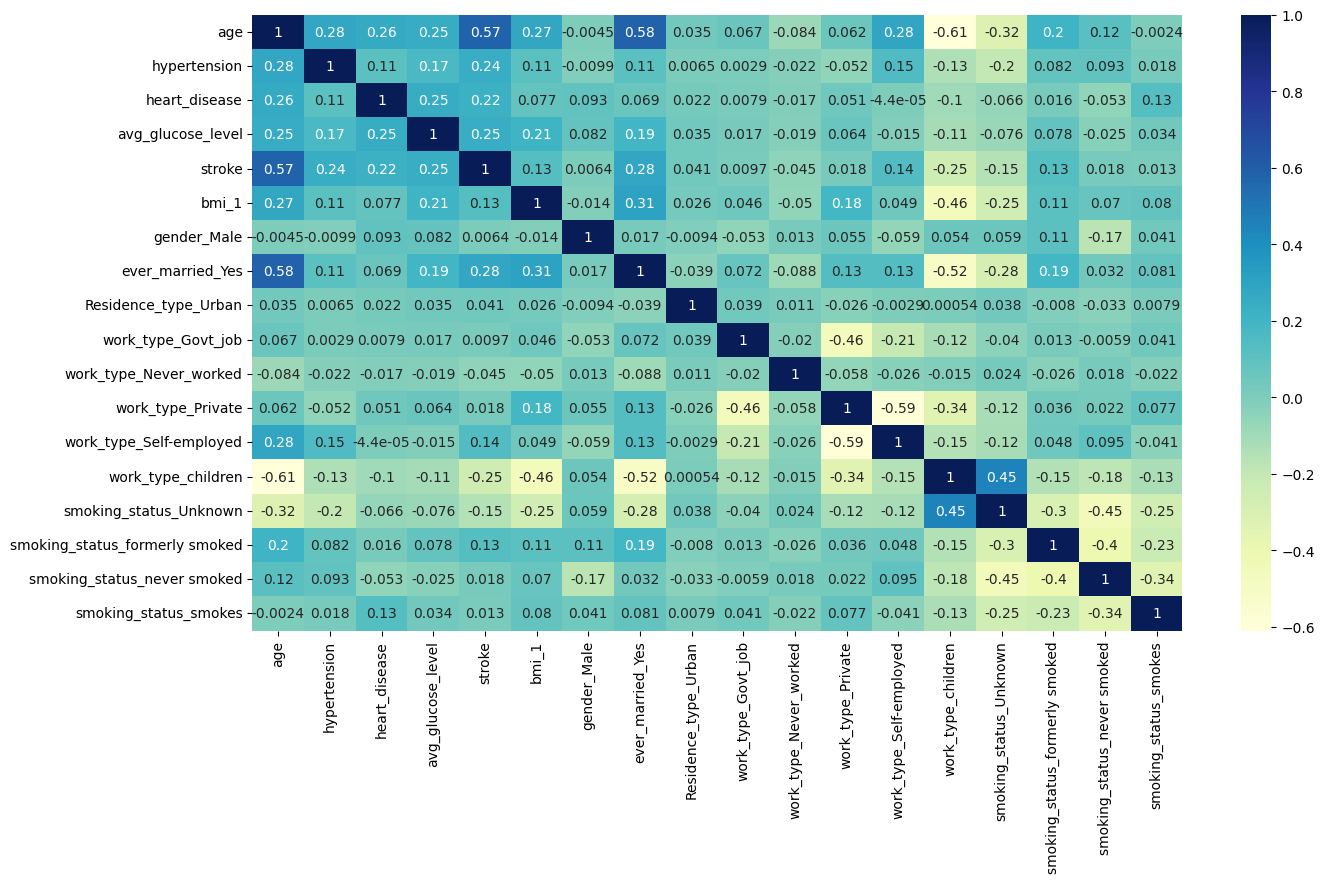

In [81]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")    ## Heat map
plt.show()

## <font color = 'blue'><b>4.4 <span style='color:#0386f7de'>|</span> Splitting data into train & test set <a id="prep"></a></font>

In [82]:
X_1 = df_3.drop(columns = 'stroke')
y_1 = df_3[['stroke']]

In [85]:
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_1, y_1, random_state = 12)  ## Spliting data into train and test.

In [86]:
X_train_1.shape,X_test_1.shape,y_train_1.shape,y_test_1.shape   ## Shape of the train and test data.

((3316, 17), (1106, 17), (3316, 1), (1106, 1))

#  <font color = 'darkpurple'><b>5 <span style='color:#0386f7de'>|</span>Model Building<a id="prep"></a></font>

###  <font color = 'blue'><b>5.1 <span style='color:#0386f7de'>|</span> Logistic Regression <a id="prep"></a></font>

In [87]:
logistic_model = LogisticRegression()    ## Importing Model
logistic_model.fit(X_train_1,y_train_1)

LogisticRegression()

In [88]:
logistic_pred_train = logistic_model.predict(X_train_1)
print('Accuracy Score                 :',round(accuracy_score(y_train_1,logistic_pred_train),4))
print('Precision Score                :',round(precision_score(y_train_1,logistic_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train_1,logistic_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train_1,logistic_pred_train))
print('Classification Report          :\n',classification_report(y_train_1,logistic_pred_train))

Accuracy Score                 : 0.7729
Precision Score                : 0.7332
Recall Score                   : 0.7733
Confusion Matrix               :
 [[1417  417]
 [ 336 1146]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      1834
           1       0.73      0.77      0.75      1482

    accuracy                           0.77      3316
   macro avg       0.77      0.77      0.77      3316
weighted avg       0.77      0.77      0.77      3316



In [89]:
logistic_pred_test = logistic_model.predict(X_test_1)
print('Accuracy Score                 :',round(accuracy_score(y_test_1,logistic_pred_test),4))
print('Precision Score                :',round(precision_score(y_test_1,logistic_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test_1,logistic_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test_1,logistic_pred_test))
print('Classification Report          :\n',classification_report(y_test_1,logistic_pred_test))

Accuracy Score                 : 0.774
Precision Score                : 0.7434
Recall Score                   : 0.7784
Confusion Matrix               :
 [[459 137]
 [113 397]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.80      0.77      0.79       596
           1       0.74      0.78      0.76       510

    accuracy                           0.77      1106
   macro avg       0.77      0.77      0.77      1106
weighted avg       0.78      0.77      0.77      1106



Area Under Curve     : 0.7742828003684694


Text(0, 0.5, 'True Positive Rate')

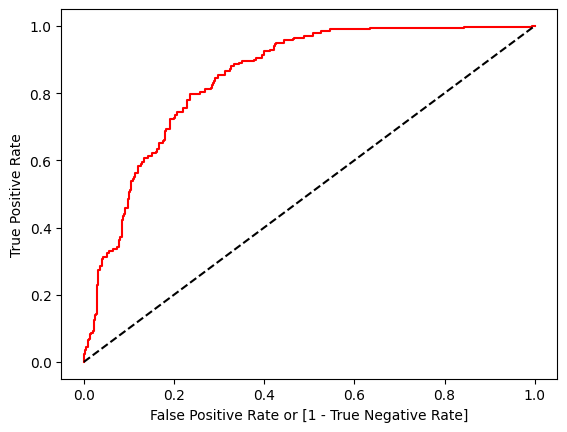

In [90]:
fpr, tpr, thresholds = roc_curve(y_test_1,logistic_model.predict_proba (X_test_1)[:,1])
auc_score = roc_auc_score(y_test_1, logistic_pred_test)
print('Area Under Curve     :',auc_score)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [91]:
n = 100
train_acc = []
test_acc = []
class1_train_acc = []
class1_test_acc = []

for i in range(n):

    from sklearn.model_selection import train_test_split
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,y_1, train_size = 0.7)


    # Building the logistic regression model on train data
    logistic = LogisticRegression()
    logistic.fit(X_train_1,y_train_1)

    # Predicting using the test data
    predict = logistic.predict(X_train_1)

    # Calculating confusion matrix
    cm= confusion_matrix(y_train_1,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    train_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0])
    class1_train_acc.append(class1_acc)


    # Building the logistic regression model on test data
    logistic = LogisticRegression()
    logistic.fit(X_test_1,y_test_1)

    # Predicting using the test data
    predict = logistic.predict(X_test_1)

    # Calculating confusion matrix
    cm = confusion_matrix(y_test_1,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    accuracy
    test_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0])
    class1_test_acc.append(class1_acc)


print("Overall Train accuracy:", train_acc , "\n")
print("Overall Test Accuracy:" , test_acc)

Overall Train accuracy: [np.float64(0.7657512116316639), np.float64(0.7712439418416801), np.float64(0.7741518578352181), np.float64(0.7722132471728594), np.float64(0.7689822294022617), np.float64(0.769951534733441), np.float64(0.7741518578352181), np.float64(0.7686591276252019), np.float64(0.761550888529887), np.float64(0.7725363489499192), np.float64(0.7654281098546042), np.float64(0.7676898222940226), np.float64(0.7667205169628433), np.float64(0.772859450726979), np.float64(0.7757673667205169), np.float64(0.7741518578352181), np.float64(0.7760904684975768), np.float64(0.7838449111470113), np.float64(0.7731825525040388), np.float64(0.7605815831987076), np.float64(0.7651050080775444), np.float64(0.7828756058158319), np.float64(0.7651050080775444), np.float64(0.7612277867528271), np.float64(0.7705977382875606), np.float64(0.7744749596122779), np.float64(0.77156704361874), np.float64(0.7631663974151858), np.float64(0.7709208400646204), np.float64(0.7747980613893376), np.float64(0.7731825

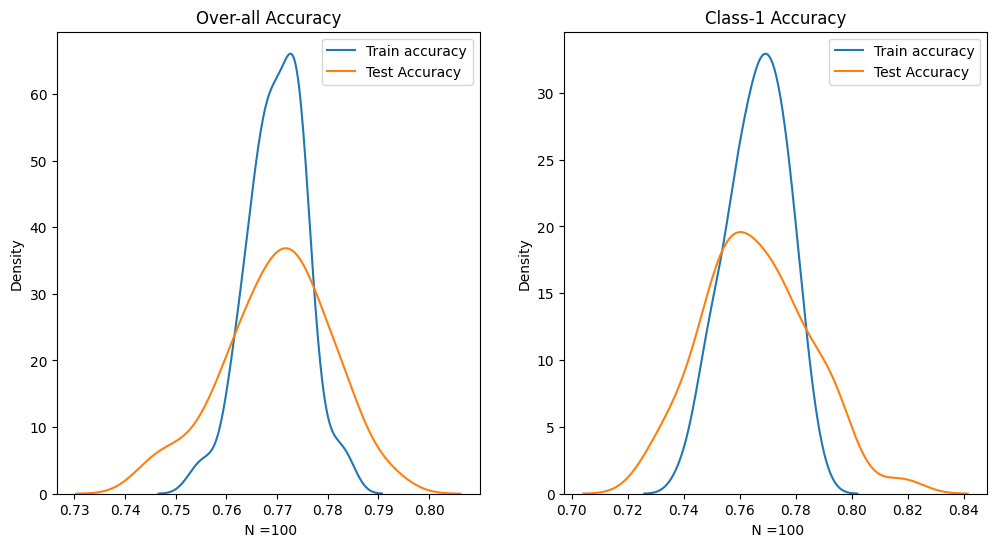

In [92]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.distplot(train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Over-all Accuracy')

plt.subplot(1,2,2)
sns.distplot(class1_train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(class1_test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Class-1 Accuracy')
plt.show()

###  <font color = 'blue'><b>5.2 <span style='color:#0386f7de'>|</span> Decision Tree <a id="prep"></a></font>

In [93]:
dt_model = DecisionTreeClassifier(random_state=15,max_depth=9)
dt_model.fit(X_train_1,y_train_1)

DecisionTreeClassifier(max_depth=9, random_state=15)

In [94]:
dt_pred_train = dt_model.predict(X_train_1)
print('Accuracy Score                 :',round(accuracy_score(y_train_1,dt_pred_train),4))
print('Precision Score                :',round(precision_score(y_train_1,dt_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train_1,dt_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train_1,dt_pred_train))
print('Classification Report          :\n',classification_report(y_train_1,dt_pred_train))

Accuracy Score                 : 0.9076
Precision Score                : 0.8498
Recall Score                   : 0.9681
Confusion Matrix               :
 [[1445  241]
 [  45 1364]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.97      0.86      0.91      1686
           1       0.85      0.97      0.91      1409

    accuracy                           0.91      3095
   macro avg       0.91      0.91      0.91      3095
weighted avg       0.92      0.91      0.91      3095



In [95]:
dt_pred_test = dt_model.predict(X_test_1)
print('Accuracy Score                 :',round(accuracy_score(y_test_1,dt_pred_test),4))
print('Precision Score                :',round(precision_score(y_test_1,dt_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test_1,dt_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test_1,dt_pred_test))
print('Classification Report          :\n',classification_report(y_test_1,dt_pred_test))

Accuracy Score                 : 0.8719
Precision Score                : 0.7946
Recall Score                   : 0.9554
Confusion Matrix               :
 [[600 144]
 [ 26 557]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.96      0.81      0.88       744
           1       0.79      0.96      0.87       583

    accuracy                           0.87      1327
   macro avg       0.88      0.88      0.87      1327
weighted avg       0.89      0.87      0.87      1327



Area Under Curve     : 0.8809273501908924


Text(0, 0.5, 'True Positive Rate')

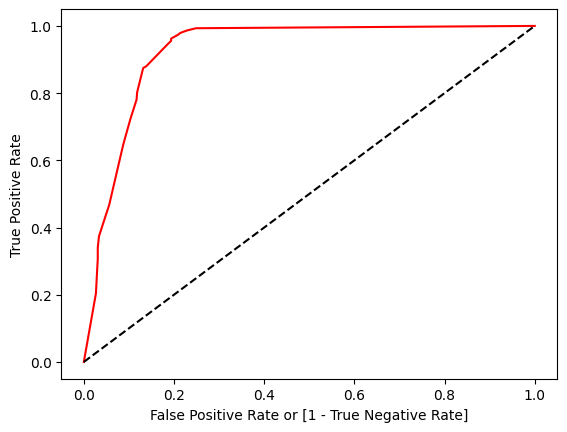

In [96]:
fpr, tpr, thresholds = roc_curve(y_test_1,dt_model.predict_proba (X_test_1)[:,1])
auc_score = roc_auc_score(y_test_1, dt_pred_test)
print('Area Under Curve     :',auc_score)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [97]:
n = 100
train_acc = []
test_acc = []
class1_train_acc = []
class1_test_acc = []

for i in range(n):

    from sklearn.model_selection import train_test_split
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,y_1, train_size = 0.7)


    # Building the logistic regression model on train data
    dt_model = DecisionTreeClassifier(random_state=15,max_depth=8)
    dt_model.fit(X_train_1,y_train_1)

    # Predicting using the test data
    predict = dt_model.predict(X_train_1)

    # Calculating confusion matrix
    cm= confusion_matrix(y_train_1,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    train_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0])
    class1_train_acc.append(class1_acc)


    # Building the logistic regression model on test data
    dt_model = DecisionTreeClassifier(random_state=15,max_depth=8)
    dt_model.fit(X_train_1,y_train_1)

    # Predicting using the test data
    predict = dt_model.predict(X_test_1)

    # Calculating confusion matrix
    cm = confusion_matrix(y_test_1,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    accuracy
    test_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0])
    class1_test_acc.append(class1_acc)


print("Overall Train accuracy:", train_acc , "\n")
print("Overall Test Accuracy:" , test_acc)

Overall Train accuracy: [np.float64(0.9017770597738287), np.float64(0.9021001615508886), np.float64(0.8933764135702746), np.float64(0.8830371567043619), np.float64(0.9056542810985461), np.float64(0.8862681744749596), np.float64(0.8904684975767366), np.float64(0.8985460420032311), np.float64(0.881421647819063), np.float64(0.8781906300484653), np.float64(0.8827140549273021), np.float64(0.8972536348949919), np.float64(0.9024232633279483), np.float64(0.9063004846526656), np.float64(0.8733441033925686), np.float64(0.8878836833602585), np.float64(0.8836833602584814), np.float64(0.892730210016155), np.float64(0.8936995153473344), np.float64(0.8739903069466882), np.float64(0.8749596122778676), np.float64(0.9037156704361874), np.float64(0.8759289176090469), np.float64(0.9021001615508886), np.float64(0.8875605815831987), np.float64(0.9030694668820679), np.float64(0.8891760904684975), np.float64(0.887237479806139), np.float64(0.8717285945072698), np.float64(0.877221324717286), np.float64(0.901453

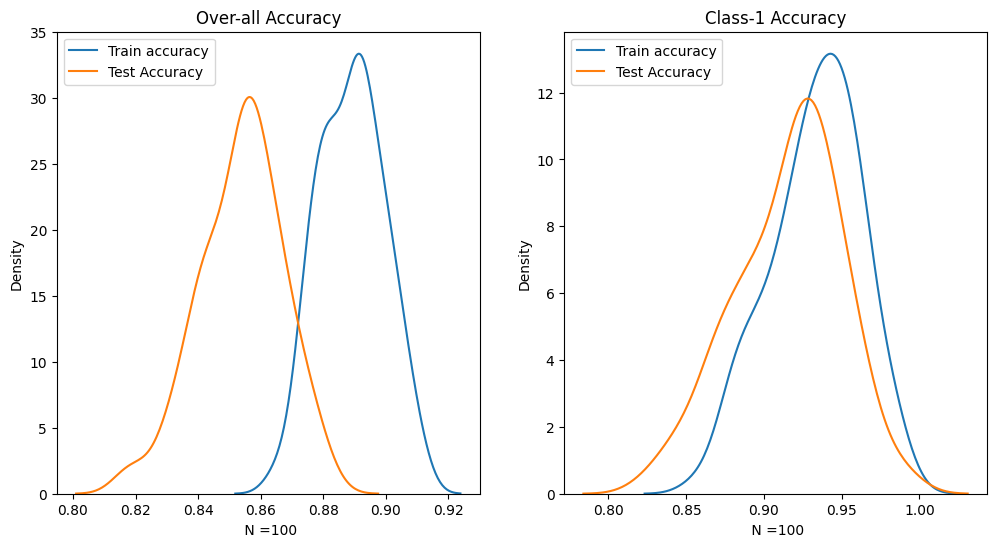

In [98]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.distplot(train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Over-all Accuracy')

plt.subplot(1,2,2)
sns.distplot(class1_train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(class1_test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Class-1 Accuracy')
plt.show()

###  <font color = 'blue'><b>5.3 <span style='color:#0386f7de'>|</span> Random Forest <a id="prep"></a></font>

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

# Assuming X_train_1, X_test_1, y_train_1, y_test_1 are defined

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=50,max_depth=8)

# Train the model
rf_model.fit(X_train_1, y_train_1.values.ravel())

# Make predictions on the training and test sets
y_pred_train = rf_model.predict(X_train_1)
y_pred_test = rf_model.predict(X_test_1)

# Calculate the confusion matrix for the test set
cm = confusion_matrix(y_test_1, y_pred_test)

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# Print overall accuracy, sensitivity and specificity for both train and test set
print("\nTraining Set:")
print("Accuracy:", accuracy_score(y_train_1, y_pred_train))
cm_train = confusion_matrix(y_train_1, y_pred_train)
tn_train, fp_train, fn_train, tp_train = cm_train.ravel()
sensitivity_train = tp_train / (tp_train + fn_train) if (tp_train + fn_train) > 0 else 0
specificity_train = tn_train / (tn_train + fp_train) if (tn_train + fp_train) > 0 else 0
print("Sensitivity:", sensitivity_train)
print("Specificity:", specificity_train)

print("\nTest Set:")
print("Accuracy:", accuracy_score(y_test_1, y_pred_test))
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


Sensitivity: 0.9188741721854304
Specificity: 0.8354080221300139

Training Set:
Accuracy: 0.9082390953150242
Sensitivity: 0.9337175792507204
Specificity: 0.8875219683655536

Test Set:
Accuracy: 0.8733986435568952
Sensitivity: 0.9188741721854304
Specificity: 0.8354080221300139


###  <font color = 'blue'><b>5.4 <span style='color:#0386f7de'>|</span> Gradient Boosting Classifier <a id="prep"></a></font>

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

# Assuming X_train_1, X_test_1, y_train_1, y_test_1 are defined

# Create a Gradient Boosting classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)

# Train the model
gb_model.fit(X_train_1, y_train_1.values.ravel())

# Make predictions on the training and test sets
y_pred_train = gb_model.predict(X_train_1)
y_pred_test = gb_model.predict(X_test_1)

# Calculate the confusion matrix for the test set
cm = confusion_matrix(y_test_1, y_pred_test)

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# Print overall accuracy, sensitivity and specificity for both train and test set
print("\nTraining Set:")
print("Accuracy:", accuracy_score(y_train_1, y_pred_train))
cm_train = confusion_matrix(y_train_1, y_pred_train)
tn_train, fp_train, fn_train, tp_train = cm_train.ravel()
sensitivity_train = tp_train / (tp_train + fn_train) if (tp_train + fn_train) > 0 else 0
specificity_train = tn_train / (tn_train + fp_train) if (tn_train + fp_train) > 0 else 0
print("Sensitivity:", sensitivity_train)
print("Specificity:", specificity_train)

print("\nTest Set:")
print("Accuracy:", accuracy_score(y_test_1, y_pred_test))
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.9006622516556292
Specificity: 0.8533886583679114

Training Set:
Accuracy: 0.9182552504038772
Sensitivity: 0.9293948126801153
Specificity: 0.9091974223784417

Test Set:
Accuracy: 0.8749058025621703
Sensitivity: 0.9006622516556292
Specificity: 0.8533886583679114


###  <font color = 'blue'><b>5.5 <span style='color:#0386f7de'>|</span> Ada Boost Classifier <a id="prep"></a></font>

In [103]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

# Create an AdaBoost classifier with a Decision Tree as the base estimator
# Changed algorithm to 'SAMME'
adaboost_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), algorithm='SAMME', n_estimators=50, random_state=42)

# Train the model
adaboost_model.fit(X_train_1, y_train_1.values.ravel())

# Make predictions on the training and test sets
y_pred_train = adaboost_model.predict(X_train_1)
y_pred_test = adaboost_model.predict(X_test_1)

# Calculate the confusion matrix for the test set
cm = confusion_matrix(y_test_1, y_pred_test)

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


# Print overall accuracy, sensitivity and specificity for both train and test set
print("\nTraining Set:")
print("Accuracy:", accuracy_score(y_train_1, y_pred_train))
cm_train = confusion_matrix(y_train_1, y_pred_train)
tn_train, fp_train, fn_train, tp_train = cm_train.ravel()
sensitivity_train = tp_train / (tp_train + fn_train) if (tp_train + fn_train) > 0 else 0
specificity_train = tn_train / (tn_train + fp_train) if (tn_train + fp_train) > 0 else 0
print("Sensitivity:", sensitivity_train)
print("Specificity:", specificity_train)

print("\nTest Set:")
print("Accuracy:", accuracy_score(y_test_1, y_pred_test))
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.9486754966887417
Specificity: 0.8547717842323651

Training Set:
Accuracy: 0.9289176090468497
Sensitivity: 0.9747838616714697
Specificity: 0.8916227299355595

Test Set:
Accuracy: 0.8975131876412962
Sensitivity: 0.9486754966887417
Specificity: 0.8547717842323651
